In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('train.csv')
data.head()

,Year,Month,Day,Hour,Minute,Clearsky DHI,Clearsky DNI,Clearsky GHI,Cloud Type,Dew Point,Temperature,Pressure,Relative Humidity,Solar Zenith Angle,Precipitable Water,Wind Direction,Wind Speed,Fill Flag
0,2009,1,1,0,0,0,0,0,0,0.0,5.0,1010,75.34,106.15,0.499,346.1,3.1,0
1,2009,1,1,0,30,0,0,0,0,1.0,5.0,1010,80.81,112.28,0.490,346.1,3.1,0
2,2009,1,1,1,0,0,0,0,4,0.0,5.0,1010,78.27,118.50,0.482,347.9,3.2,0
3,2009,1,1,1,30,0,0,0,4,0.0,4.0,1010,78.27,124.78,0.478,347.9,3.1,0
4,2009,1,1,2,0,0,0,0,4,0.0,4.0,1010,76.45,131.12,0.475,350.0,3.0,0


In [3]:
def format_date(value):
    if len(str(value)) != 2:
        return '0' + str(value)
    else:
        return str(value)

data['Date'] = pd.to_datetime(pd.DataFrame({
                    'year': data.Year,
                   'month': data.Month,
                   'day': data.Day,
                    'minute': (data.Hour * 60 + data.Minute)
                }))
data = data.drop(['Year','Month','Day','Hour','Minute'], axis=1)

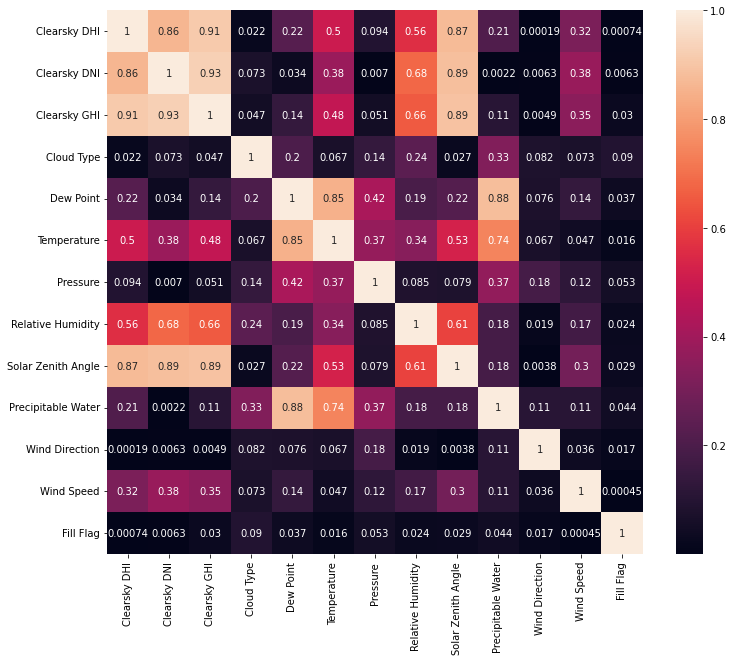

In [4]:
plt.figure(figsize=(12, 10))
sns.heatmap(data.corr().abs(), annot=True)
plt.show()

In [5]:
drop = ['Cloud Type', 'Wind Direction', 'Fill Flag', 'Clearsky GHI']
data = data.drop(drop, axis = 1)
data.head()

,Clearsky DHI,Clearsky DNI,Dew Point,Temperature,Pressure,Relative Humidity,Solar Zenith Angle,Precipitable Water,Wind Speed,Date
0,0,0,0.0,5.0,1010,75.34,106.15,0.499,3.1,2009-01-01 00:00:00
1,0,0,1.0,5.0,1010,80.81,112.28,0.490,3.1,2009-01-01 00:30:00
2,0,0,0.0,5.0,1010,78.27,118.50,0.482,3.2,2009-01-01 01:00:00
3,0,0,0.0,4.0,1010,78.27,124.78,0.478,3.1,2009-01-01 01:30:00
4,0,0,0.0,4.0,1010,76.45,131.12,0.475,3.0,2009-01-01 02:00:00


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 175296 entries, 0 to 175295
Data columns (total 10 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   Clearsky DHI        175296 non-null  int64         
 1   Clearsky DNI        175296 non-null  int64         
 2   Dew Point           175296 non-null  float64       
 3   Temperature         175296 non-null  float64       
 4   Pressure            175296 non-null  int64         
 5   Relative Humidity   175296 non-null  float64       
 6   Solar Zenith Angle  175296 non-null  float64       
 7   Precipitable Water  175296 non-null  float64       
 8   Wind Speed          175296 non-null  float64       
 9   Date                175296 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(6), int64(3)
memory usage: 13.4 MB


In [7]:
data.columns = ['Clearsky_DHI', 'Clearsky_DNI', 'Dew_Point', 'Temperature','Pressure', 'Relative_Humidity', 'Solar_Zenith_Angle', 'Precipitable_Water', 'Wind_Speed', 'Date']
data.head()

,Clearsky_DHI,Clearsky_DNI,Dew_Point,Temperature,Pressure,Relative_Humidity,Solar_Zenith_Angle,Precipitable_Water,Wind_Speed,Date
0,0,0,0.0,5.0,1010,75.34,106.15,0.499,3.1,2009-01-01 00:00:00
1,0,0,1.0,5.0,1010,80.81,112.28,0.490,3.1,2009-01-01 00:30:00
2,0,0,0.0,5.0,1010,78.27,118.50,0.482,3.2,2009-01-01 01:00:00
3,0,0,0.0,4.0,1010,78.27,124.78,0.478,3.1,2009-01-01 01:30:00
4,0,0,0.0,4.0,1010,76.45,131.12,0.475,3.0,2009-01-01 02:00:00


In [8]:
data_DHI = data.drop(['Clearsky_DNI'], axis = 1)

In [9]:
data_DNI = data.drop(['Clearsky_DHI'], axis = 1)

In [10]:
data_DHI.head()

,Clearsky_DHI,Dew_Point,Temperature,Pressure,Relative_Humidity,Solar_Zenith_Angle,Precipitable_Water,Wind_Speed,Date
0,0,0.0,5.0,1010,75.34,106.15,0.499,3.1,2009-01-01 00:00:00
1,0,1.0,5.0,1010,80.81,112.28,0.490,3.1,2009-01-01 00:30:00
2,0,0.0,5.0,1010,78.27,118.50,0.482,3.2,2009-01-01 01:00:00
3,0,0.0,4.0,1010,78.27,124.78,0.478,3.1,2009-01-01 01:30:00
4,0,0.0,4.0,1010,76.45,131.12,0.475,3.0,2009-01-01 02:00:00


In [11]:
data_DNI.head()

,Clearsky_DNI,Dew_Point,Temperature,Pressure,Relative_Humidity,Solar_Zenith_Angle,Precipitable_Water,Wind_Speed,Date
0,0,0.0,5.0,1010,75.34,106.15,0.499,3.1,2009-01-01 00:00:00
1,0,1.0,5.0,1010,80.81,112.28,0.490,3.1,2009-01-01 00:30:00
2,0,0.0,5.0,1010,78.27,118.50,0.482,3.2,2009-01-01 01:00:00
3,0,0.0,4.0,1010,78.27,124.78,0.478,3.1,2009-01-01 01:30:00
4,0,0.0,4.0,1010,76.45,131.12,0.475,3.0,2009-01-01 02:00:00


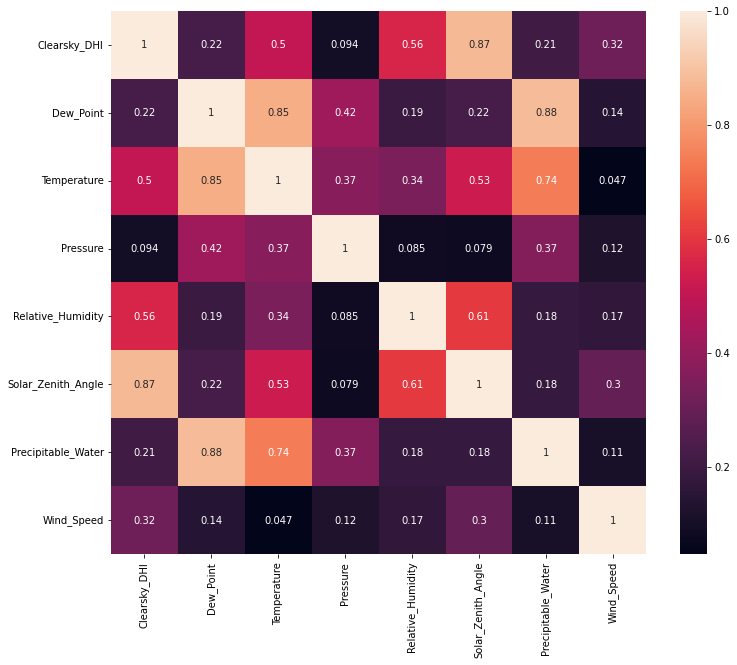

In [12]:
plt.figure(figsize=(12, 10))
sns.heatmap(data_DHI.corr().abs(), annot=True)
plt.show()

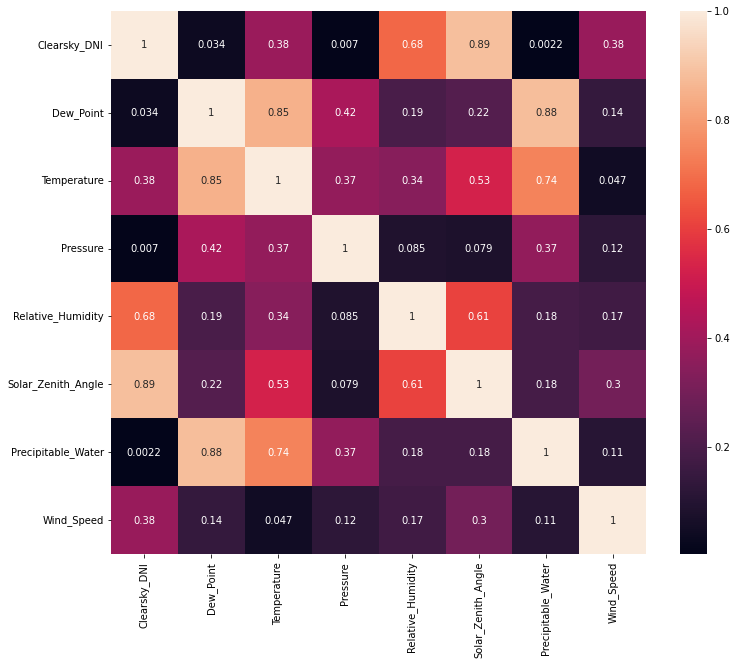

In [13]:
plt.figure(figsize=(12, 10))
sns.heatmap(data_DNI.corr().abs(), annot=True)
plt.show()

In [14]:
data_DNI = data_DNI.drop(['Precipitable_Water', 'Pressure'], axis = 1)
data_DNI.head()

,Clearsky_DNI,Dew_Point,Temperature,Relative_Humidity,Solar_Zenith_Angle,Wind_Speed,Date
0,0,0.0,5.0,75.34,106.15,3.1,2009-01-01 00:00:00
1,0,1.0,5.0,80.81,112.28,3.1,2009-01-01 00:30:00
2,0,0.0,5.0,78.27,118.50,3.2,2009-01-01 01:00:00
3,0,0.0,4.0,78.27,124.78,3.1,2009-01-01 01:30:00
4,0,0.0,4.0,76.45,131.12,3.0,2009-01-01 02:00:00


In [15]:
data_DNI.shape

(175296, 7)

In [16]:
data_DHI.shape

(175296, 9)

In [17]:
X_DNI = data_DNI.drop(['Clearsky_DNI'], axis = 1)
X_DHI = data_DHI.drop(['Clearsky_DHI'], axis = 1)

y_DNI = data['Clearsky_DNI']
y_DHI = data['Clearsky_DHI']

In [18]:
x = data['Date']
X_DHI = data_DHI.drop(['Date'], axis = 1)
X_DNI = data_DNI.drop(['Date'], axis = 1)

In [19]:
columns_X_DHI = X_DHI.columns
columns_X_DHI

Index(['Clearsky_DHI', 'Dew_Point', 'Temperature', 'Pressure',
       'Relative_Humidity', 'Solar_Zenith_Angle', 'Precipitable_Water',
       'Wind_Speed'],
      dtype='object')

In [20]:
columns_X_DNI = X_DNI.columns
columns_X_DNI

Index(['Clearsky_DNI', 'Dew_Point', 'Temperature', 'Relative_Humidity',
       'Solar_Zenith_Angle', 'Wind_Speed'],
      dtype='object')

In [21]:
from sklearn.model_selection import train_test_split
X_train_DNI, X_test_DNI, y_train_DNI, y_test_DNI = train_test_split(X_DNI, y_DNI, test_size = 0.25, random_state = 0)
X_train_DHI, X_test_DHI, y_train_DHI, y_test_DHI = train_test_split(X_DHI, y_DHI, test_size = 0.25, random_state = 0)

In [22]:
X_train_DHI.shape, y_train_DHI.shape

((131472, 8), (131472,))

In [23]:
X_train_DNI.shape, y_train_DNI.shape

((131472, 6), (131472,))

In [24]:
X_test_DHI.shape, y_test_DHI.shape

((43824, 8), (43824,))

In [25]:
'''X_DHI['Date'] = pd.to_numeric(X_DHI['Date'])
#X_DHI['Date'] = X_DHI['Date'].map(dt.datetime.toordinal)
X_DNI['Date'] = pd.to_numeric(X_DNI['Date'])
#X_DNI['Date'] = X_DNI['Date'].map(dt.datetime.toordinal)
X_DNI = X_DNI.drop(['Date'], axis = 1)
x_DHI = X_DHI.drop(['Date'], axis = 1)
#X_DNI['Date'].info'''
X_DNI.head()

,Clearsky_DNI,Dew_Point,Temperature,Relative_Humidity,Solar_Zenith_Angle,Wind_Speed
0,0,0.0,5.0,75.34,106.15,3.1
1,0,1.0,5.0,80.81,112.28,3.1
2,0,0.0,5.0,78.27,118.50,3.2
3,0,0.0,4.0,78.27,124.78,3.1
4,0,0.0,4.0,76.45,131.12,3.0


In [26]:
X_DHI.head()

,Clearsky_DHI,Dew_Point,Temperature,Pressure,Relative_Humidity,Solar_Zenith_Angle,Precipitable_Water,Wind_Speed
0,0,0.0,5.0,1010,75.34,106.15,0.499,3.1
1,0,1.0,5.0,1010,80.81,112.28,0.490,3.1
2,0,0.0,5.0,1010,78.27,118.50,0.482,3.2
3,0,0.0,4.0,1010,78.27,124.78,0.478,3.1
4,0,0.0,4.0,1010,76.45,131.12,0.475,3.0


In [27]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
lin = LinearRegression()
lin1 = LinearRegression()
lin.fit(X_train_DNI, y_train_DNI)
lin1.fit(X_train_DHI, y_train_DHI)
prediction_DHI = lin1.predict(X_test_DHI)
prediction_DNI = lin.predict(X_test_DNI)
print(r2_score(y_test_DNI,prediction_DNI)*100)
print(r2_score(y_test_DHI,prediction_DHI)*100)

100.0
100.0


In [28]:

from sklearn.preprocessing import PolynomialFeatures
lin.fit(X_train_DNI, y_train_DNI)
lin.fit(X_train_DHI, y_train_DHI)
poly_regs= PolynomialFeatures(degree= 1)
X_train_DNI_poly = poly_regs.fit_transform(X_train_DNI)
X_train_DHI_poly = poly_regs.fit_transform(X_train_DHI)
lin2 = LinearRegression()
lin3 = LinearRegression()
lin2.fit(X_train_DNI_poly, y_train_DNI)
lin3.fit(X_train_DHI_poly, y_train_DHI)
poly_pred_DHI = lin3.predict(poly_regs.fit_transform(X_test_DHI))
poly_pred_DNI = lin2.predict(poly_regs.fit_transform(X_test_DNI))
#prediction_DHI = lin.predict(X_test_DHI)
#prediction_DNI = lin.predict(X_test_DHI)
print(r2_score(y_test_DNI,poly_pred_DNI)*100)
print(r2_score(y_test_DHI,poly_pred_DHI)*100)
poly_pred_DNI[:5]

100.0
100.0


array([-1.07706499e-10,  8.90000000e+02, -1.06305822e-10, -1.08401216e-10,
        6.69000000e+02])

In [29]:
y_test_DNI[:5]

41050       0
128815    890
110180      0
32406       0
80479     669
Name: Clearsky_DNI, dtype: int64

In [36]:
poly_pred_DNI = poly_pred_DNI.astype(int)
poly_pred_DHI = poly_pred_DHI.astype(int)

In [37]:
poly_pred_DNI[:100]

array([  0, 890,   0,   0, 669,   0, 818,   0,   0,   0,  20,   0, 880,
       732, 327, 822,   0,   0,   0, 753, 821,   0, 708, 925,   0, 789,
       197,   0,   0,   0, 596, 854, 868, 475,   0,   0, 181, 742, 832,
         0, 335,   0,   0, 884,   0,   0,   0,   0,   0, 662,   0, 834,
         0,   0,   0,  94,   8, 933,   0,   0,   0,   0,   0,   0, 620,
         0, 836,   0,   0,   0,   0, 472, 767,   0, 899,   0,   0, 693,
       800,   0,   0, 552, 780, 266, 813, 545,   0, 877,   0,   0,   0,
       538,   0,   0,   0,   0, 805,   0, 774,   0])

In [38]:
poly_pred_DHI[:100]

array([  0, 131,   0,   0, 215,   0, 114,   0,   0,   0,   7,   0,  98,
       140,  55, 139,   0,   0,   0,  62, 145,   0, 126,  74,   0, 135,
        44,   0,   0,   0, 107,  92,  84,  95,   0,   0,  70, 114, 143,
         0,  57,   0,   0, 133,   0,   0,   0,   0,   0, 163,   0,  86,
         0,   0,   0,  38,   5,  72,   0,   0,   0,   0,   0,   0, 113,
         0, 131,   0,   0,   0,   0, 142, 160,   0, 107,   0,   0, 236,
       114,   0,   0,  72, 126,  84, 134, 193,   0,  85,   0,   0,   0,
       119,   0,   0,   0,   0, 162,   0, 109,   0])